# Генерация систем непрерывных и дискретных случайных величин

In [42]:
import math
import random as r
import numpy as np
import scipy.stats as st
import scipy.integrate as _in
import matplotlib.pyplot as plt

## Формирование двумерной НСВ
### Генерация значений

In [43]:
# Функция для 2 варианта
fxy = lambda x, y: math.sin(x + y) / 2

# Параметры функции
a = 0
b = math.pi / 2
fxy_max = 1

N = 1000000

# Условная плотность распределения f(x)
#def f_dx(x: float):
    #if x < 0 or x > math.pi / 2:
        #return 0
    #return 0.5*(math.cos(x) - math.cos(x + math.pi / 2))

# Условная плотность распределения f(y)
#def f_dy(y: float):
    #if y < 0 or y > math.pi / 2:
        #return 0
    #return 0.5*(math.cos(y) - math.cos(y + math.pi / 2))

x_l, y_l = [], []
for _ in range(N):
    while True:
        x_, y_ = (a + r.random() * (b - a) for _ in range(2))
        z_ = r.random() * fxy_max
        if fxy(x_, y_) > z_:
            #if f_dx(x_) != 0 and f_dy(y_) != 0:
            #new_x = f_dx(x_)
            #new_y = f_dy(y_)
            x_l.append(x_)
            y_l.append(y_)
            break

### Статистические исследования
#### Мат. ожидания, дисперии, коэффициенты корреляции

In [44]:
M_f = lambda l: sum(l) / N
D_f = lambda l: sum(e ** 2 for e in l) / N - M_f(l) ** 2
# Коэффициент корреляции
r_f = lambda M_xy, M_x, M_y, D_x, D_y: (M_xy - M_x * M_y) / math.sqrt(D_x * D_y)

_kwargs = {
    'a': a,
    'b': b,
    'gfun': lambda x: a,
    'hfun': lambda x: b
}



# Рассчитываем теоритические компоненты
# Мат.ожидание по M() будет одинаковым для x и y
M_th = _in.dblquad(lambda x, y: x * math.sin(x + y) / 2, **_kwargs)[0]
M_th_2 = _in.dblquad(lambda x, y: x ** 2 * math.sin(x + y) / 2, **_kwargs)[0]
# Дисперсия
# x^2*f(x)dx - мат.ожидание^2
D_th = M_th_2 - M_th ** 2
M_xy_th = _in.dblquad(lambda x, y: x * y * math.sin(x + y) / 2, **_kwargs)[0]

print('Теоретические характеристики')
print('M[x] =', M_th, 'D[x] =', D_th)
print('M[y] =', M_th, 'D[y] =', D_th)
print('r[xy] =', r_f(M_xy_th, M_th, M_th, D_th, D_th))
print()
print('Полученные характеристики')
print('M[x] =', M_f(x_l), 'D[x] =', D_f(x_l))
print('M[y] =', M_f(y_l), 'D[y] =', D_f(y_l))
print('r[xy] =', st.pearsonr(x_l, y_l)[0])

Теоретические характеристики
M[x] = 0.7853981633974483 D[x] = 0.18764660186298154
M[y] = 0.7853981633974483 D[y] = 0.18764660186298154
r[xy] = -0.24542916213754049

Полученные характеристики
M[x] = 0.7847936578360261 D[x] = 0.18775752766162312
M[y] = 0.7858795143982965 D[y] = 0.1878501983889801
r[xy] = -0.2460501052789033


#### Гистограммы

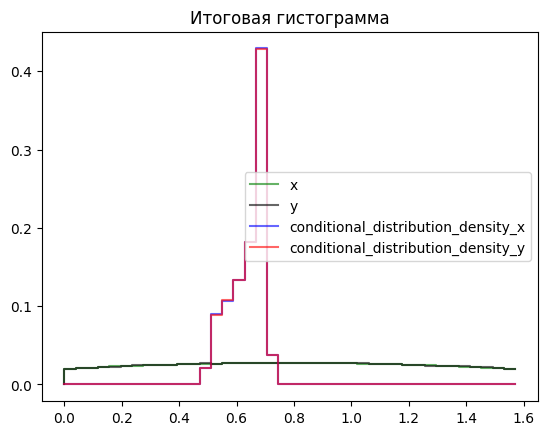

In [45]:
K = 40
d = (b - a) / K
# Отрезки, на которых считаются частоты(x на графике)
di_l = [i * d for i in range(K + 1)]

# Условная плотность распределения f(x)
def f_dx(x: float):
    if x < 0 or x > math.pi / 2:
        return 0
    return 0.5*(math.cos(x) - math.cos(x + math.pi / 2))

# Условная плотность распределения f(y)
def f_dy(y: float):
    if y < 0 or y > math.pi / 2:
        return 0
    return 0.5*(math.cos(y) - math.cos(y + math.pi / 2))
# Рисует график условной плотности распределения по x
def draw_plot_conditional_distribution_density_x(l, **kwargs):
    new_x_l = []
    for x in l:
        test_x = f_dx(x)
        if test_x != 0:
            new_x_l.append(test_x)
    v_l = [
        len(list(filter(lambda v: di - d <= v < di, new_x_l))) / N
        for di in di_l
    ]
    plt.plot(di_l, v_l, drawstyle='steps-pre', alpha=0.6, **kwargs)

# Рисует график условной плотности распределения по y
def draw_plot_conditional_distribution_density_y(l, **kwargs):
    new_y_l = []
    for y in l:
        test_y = f_dy(y)
        if test_y != 0:
            new_y_l.append(test_y)
    v_l = [
        len(list(filter(lambda v: di - d <= v < di, new_y_l))) / N
        for di in di_l
    ]
    plt.plot(di_l, v_l, drawstyle='steps-pre', alpha=0.6, **kwargs)
    
def draw_plot(mas, **kwargs):
    v_l = [
        len(list(filter(lambda v: di - d <= v < di, mas))) / N
        for di in di_l
    ]
    plt.plot(di_l, v_l, drawstyle='steps-pre', alpha=0.6, **kwargs)

draw_plot(x_l, label='x', color='g')
draw_plot(y_l, label='y', color='black')
draw_plot_conditional_distribution_density_x(x_l, label='conditional_distribution_density_x', color='b')
draw_plot_conditional_distribution_density_y(y_l, label='conditional_distribution_density_y', color='r')

plt.title(f'Итоговая гистограмма')
plt.legend()
plt.show()

## Формирование двумерной ДСВ

In [46]:
X = [1, 2, 3, 4, 5]
Y = [10, 20, 30, 40, 50]
P = [
    [0, 0, 0.05, 0.05, 0.1],
    [0.025, 0.025, 0.025, 0.025, 0.04],
    [0.05, 0.025, 0, 0, 0.1],
    [0.11, 0.07, 0.03, 0.05, 0.055],
    [0.070, 0.05, 0.05, 0, 0]
]

p_x = [sum(row) for row in P]
# zip создает из нескольких списков один
p_y = [sum(y) for y in zip(*P)]

# С помощью enumerate сразу получаем и индекс и значение
p_yi = [[y / p_x[i] for y in row] for i, row in enumerate(P)]

# Считаем кумулятивную сумму
F_x = np.cumsum(p_x)
F_y = [np.cumsum(p_yi[i]) for i in range(len(Y))]

### Генерация значений

In [47]:
def get_var_and_index(x, F_x, p):
    '''
    Получает значение и индекс числа по вероятности.
    '''
    return next((x[i], i) for i, p_ in enumerate(F_x) if p_ >= p)

n = 10000

x_l, y_l = [], []
for _ in range(n):
    x, i = get_var_and_index(X, F_x, r.random())
    x_l.append(x)
    y_l.append(get_var_and_index(Y, F_y[i], r.random())[0])
    
p_x_imp = [x_l.count(X[i]) / n for i in range(len(X))]
p_y_imp = [y_l.count(Y[i]) / n for i in range(len(Y))]

### Статистические исследования

In [48]:
M_f = lambda v, p_v: sum([v[i] * p_v[i] for i in range(len(v))])

def D_f(v, p_v, M=None):
    if M is None:
        M = M_f(v, p_v)
    return sum([(v[i] ** 2) * p_v[i] for i in range(len(v))]) - M ** 2

M_x = M_f(X, p_x)
M_y = M_f(Y, p_y)
M_xy = sum([
    sum([x * y * P[i][j] for j, y in enumerate(Y)])
    for i, x in enumerate(X)
])
D_x = D_f(X, p_x, M_x)
D_y = D_f(Y, p_y, M_y)

print('Теоретические характеристики')
print('M[x] =', M_x, 'D[x] =', D_x)
print('M[y] =', M_y, 'D[y] =', D_y)
print('r[xy] =', r_f(M_xy, M_x, M_y, D_x, D_y))
print()
print('Эмпирические характеристики')
print('M[x] =', M_f(X, p_x_imp), 'D[x] =', D_f(X, p_x_imp))
print('M[y] =', M_f(Y, p_y_imp), 'D[y] =', D_f(Y, p_y_imp))
print('r =', st.pearsonr(x_l, y_l)[0])


Теоретические характеристики
M[x] = 3.115 D[x] = 1.9217749999999985
M[y] = 30.35 D[y] = 249.37749999999994
r[xy] = -0.47690403306892665

Эмпирические характеристики
M[x] = 3.1284 D[x] = 1.9323134399999997
M[y] = 30.271 D[y] = 250.37655900000004
r = -0.48340582288837847


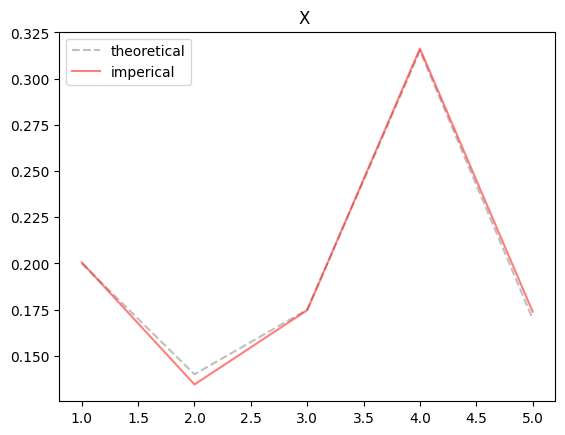

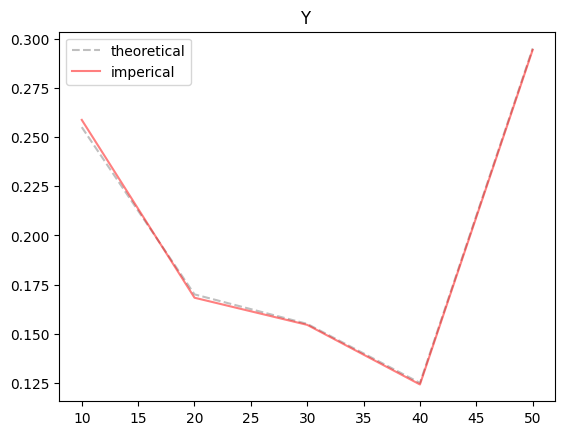

In [49]:
def draw_plot(v, p_v, p_v_imp, var_name):
    plt.plot(v, p_v, label='theoretical', color='gray', alpha=0.5, ls='--')
    plt.plot(v, p_v_imp, label=f'imperical', color='r', alpha=0.5)
    plt.title(f'{var_name} ')
    plt.legend()
    plt.show()

draw_plot(X, p_x, p_x_imp, 'X')
draw_plot(Y, p_y, p_y_imp, 'Y')